# Init

In [1]:
%%capture
import importlib
from cycler import cycler
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import sys
sys.path.insert(0, 'geo')
sys.path.insert(0, 'bandstructure')

import caustic_frame
importlib.reload(caustic_frame)

import caustic_bandstructure
importlib.reload(caustic_bandstructure)

from delafossite_bandstructure import delafossite

import monte_carlo_simulation as mcs

# Set default plotting parameters

plt.rcParams['axes.prop_cycle'] = cycler(
    color=['#E24A33','#348ABD','#988ED5','#777777',
           '#FBC15E','#8EBA42','#FFB5B8'])

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 1


plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize']=12

# Generate frame

We load in a dxf file and generate a frame for the simulation. The frame consists of a collection of edges (a helper class where we easily story information about a given edge, such as its vertices and layer). 

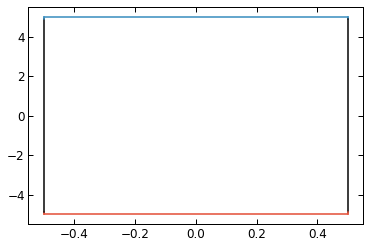

In [2]:
frame = caustic_frame.Frame('geo/bar.dxf')
frame.gen_fig();

In [3]:
frame.edges

[((-0.5, 5.0), (0.5, 5.0), 2),
 ((0.5, 5.0), (0.5, 4.9), 2),
 ((0.5, 4.9), (0.5, -4.9), 0),
 ((0.5, -4.9), (0.5, -5.0), 1),
 ((0.5, -5.0), (-0.5, -5.0), 1),
 ((-0.5, -5.0), (-0.5, -4.9), 1),
 ((-0.5, -4.9), (-0.5, 4.9), 0),
 ((-0.5, 4.9), (-0.5, 5.0), 2)]

# Bandstructure

Next, we call the delafossite function, which returns a list of k's which we then input into a Bandstructure. 

This Bandstructure class and do things such as rotate the Fermi surface and generate the real space trajectories for a given field. 

In [4]:
k = delafossite()
bs = caustic_bandstructure.Bandstructure(k, 0, -10)

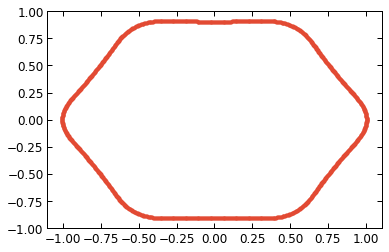

In [5]:
plt.figure()
plt.plot(bs.k[0], bs.k[1], '.')

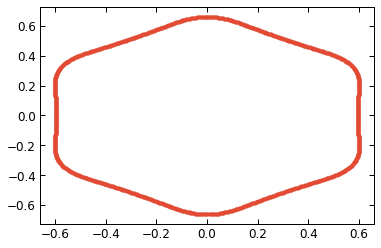

In [6]:
plt.figure()
plt.plot(bs.r[0], bs.r[1], '.')

Switching the sign of the field switches the direction the Fermi surface is indexed (i.e. $2 \pi$ to $0$ instead of $0$ to $2 \pi$.

In [7]:
k = delafossite()
bs = caustic_bandstructure.Bandstructure(k, 0, 10)

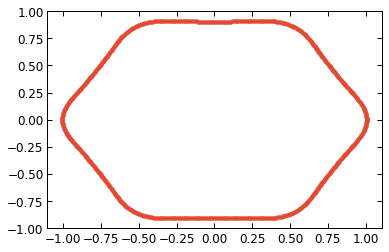

In [8]:
plt.figure()
plt.plot(bs.k[0], bs.k[1], '.')

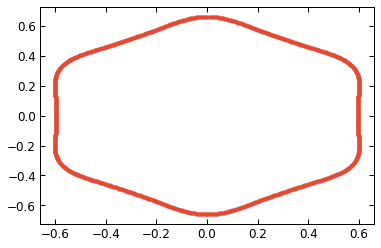

In [9]:
plt.figure()
plt.plot(bs.r[0], bs.r[1], '.')

# Simulation

In [10]:
k = delafossite()
sim = mcs.Simulation(frame, k, 0, -10, 1)

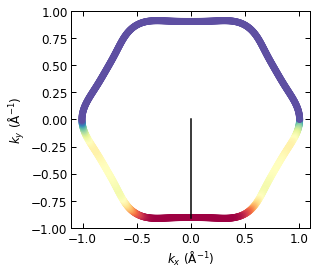

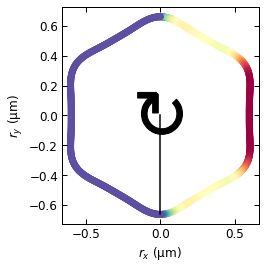

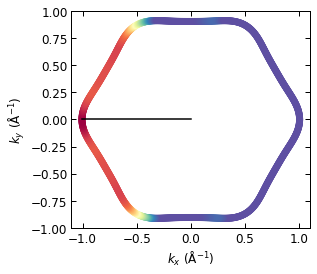

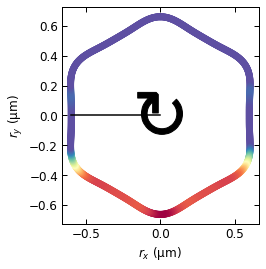

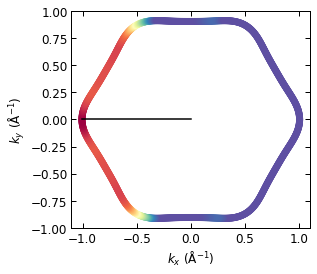

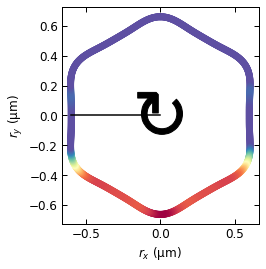

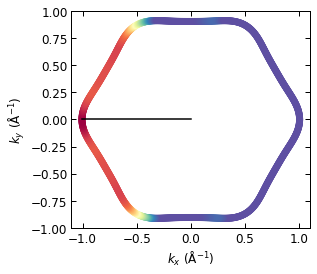

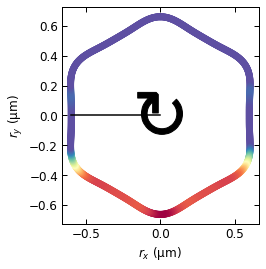

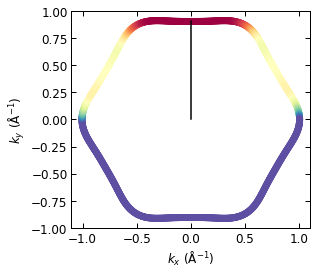

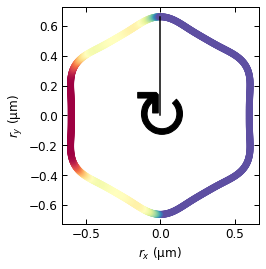

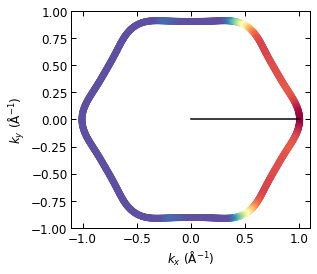

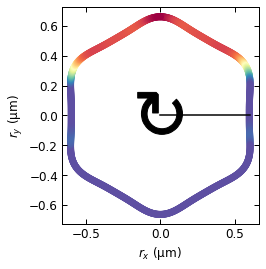

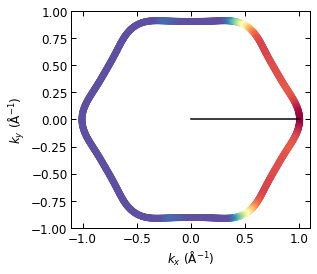

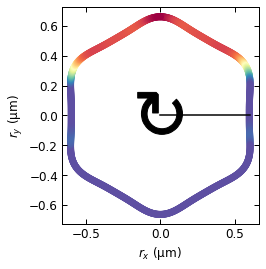

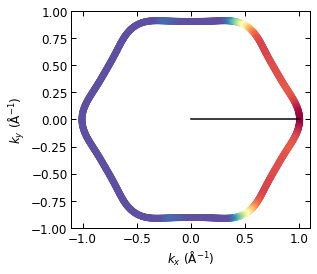

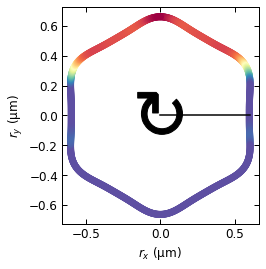

In [11]:
cmap = plt.get_cmap('Spectral_r')

for edge in sim.frame.edges:
    max_p = np.max(edge.in_prob)
    colors = np.array([cmap(p/max_p) for p in edge.in_prob])
    colors = np.append(colors, [colors[0]], axis=0)
    
    fig, ax = plt.subplots()
    plt.plot((0, (np.max(sim.bandstructure.k[0]*np.cos(edge.normal_angle)))*np.cos(edge.normal_angle)), (0, (np.max(sim.bandstructure.k[1]*np.sin(edge.normal_angle)))*np.sin(edge.normal_angle)),'k')
    plt.scatter(sim.bandstructure.k[0], sim.bandstructure.k[1],c=colors)
    plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
    plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
    ax.set_aspect('equal')
    
    fig, ax = plt.subplots()
    plt.plot([-0.02], [0], marker=r'$\circlearrowright$', ms=50, color='k')
    plt.plot((0, (np.max(sim.bandstructure.r[0]*np.cos(edge.normal_angle)))*np.cos(edge.normal_angle)), (0, (np.max(sim.bandstructure.r[1]*np.sin(edge.normal_angle)))*np.sin(edge.normal_angle)),'k')
    plt.scatter(sim.bandstructure.r[0], sim.bandstructure.r[1],c=colors)
    plt.xlabel(r'$r_x\ (\mathrm{\mu m})$')
    plt.ylabel(r'$r_y\ (\mathrm{\mu m})$')
    ax.set_aspect('equal')

In [12]:
layer = 2
inds = []
n = 1000
freq = np.zeros(10)
for i in range(n):
    (x,y), edge = frame.get_inject_position(layer)
    for ind,testedge in enumerate(frame.edges):
        if edge == testedge:
            inds.append(ind)
            freq[ind] += 1

prob = freq/n

In [13]:
inds = []
n = 1000
freq = np.zeros(999)

for i in range(n):
    ind = sim.frame.edges[0].get_injection_index()
    inds.append(ind)
    freq[ind[0]] += 1
    
prob = freq/n

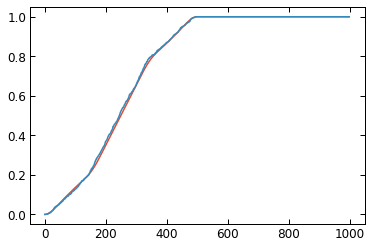

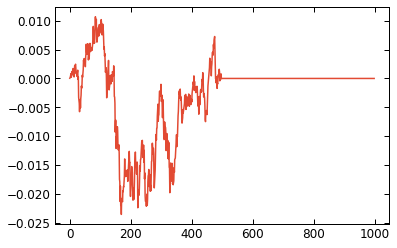

In [14]:
plt.figure()
plt.plot(sim.frame.edges[0].cum_prob)
plt.plot(np.cumsum(prob))

plt.figure()
plt.plot(sim.frame.edges[0].cum_prob-np.cumsum(prob))